In [2]:
import torch
import numpy as np
from scipy.integrate import quad

In [3]:
from scipy.integrate import solve_ivp

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [7]:
#solution of u_t = cu_xx for points (X,T)
def heat_solution(coeff, X, T, ic):
    #heat kernel
    def integrand(y, x, t):
        return 1 / (np.sqrt(4 * np.pi * coeff * t)) * np.exp(- (x-y)**2 / (4 * coeff * t)) * ic(y)

    #calculate at each point
    u = np.ones((X.shape[0], X.shape[0]))
    for i in range(X.shape[0]):
        u[i,0] = ic(X[i])
        for j in range(1, X.shape[0]):
            u[i, j] = quad(lambda y : integrand(y, X[i], T[j]), -100, 100)[0]
    return u

In [48]:
X = np.linspace(0, 3, 100)
T = np.linspace(0, 3, 100)
u = heat_solution(1, X, T, lambda y : 3/2*np.sin(3*y)+np.sin(5*y))

In [20]:
u[2, :]

array([5.69634107e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.92069545e-05, 2.15715765e-05, 1.59322641e-05,
       1.17671993e-05, 8.69097938e-06, 6.41895500e-06, 4.74089070e-06,
       3.50151148e-06, 2.58613484e-06, 1.91005898e-06, 1.41072509e-06,
       1.04192870e-06, 7.69544276e-07, 5.68367483e-07, 4.19782989e-07,
       3.10041941e-07, 2.28989758e-07, 1.69126503e-07, 1.24912897e-07,
       9.22577572e-08, 6.81394313e-08, 5.03261973e-08, 3.71697575e-08,
       2.74527174e-08, 2.02759378e-08, 1.49753355e-08, 1.10604341e-08,
       8.16897910e-09, 6.03341775e-09, 4.45614186e-09, 3.29120261e-09,
      

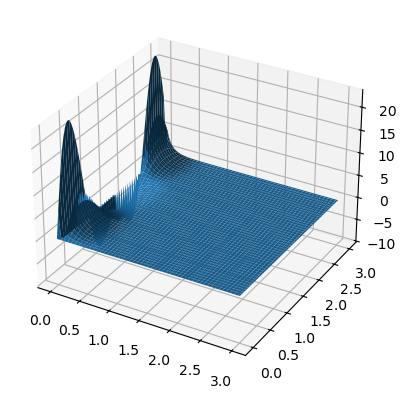

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, T = np.meshgrid(X, T)
ax.plot_surface(X, T, 10*u)

<Axes: >

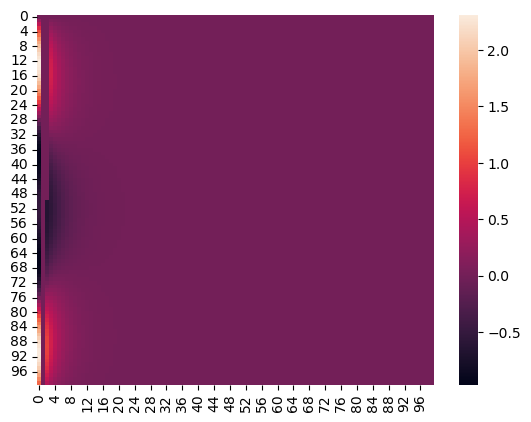

In [50]:
sns.heatmap(u)

In [25]:
#try solving by solve_ivp, method BDF

def heat_equation(t, T, alpha, dx):

    """ 

    Function representing the time derivative of temperature at each spatial point 

    based on the 1D heat equation using finite difference.

    """

    dTdt = np.zeros_like(T)

    for i in range(1, len(T) - 1):

        dTdt[i] = alpha * (T[i + 1] - 2 * T[i] + T[i - 1]) / (dx**2)

    return dTdt



# Parameters

L = 3  # Length of the domain

N = 200  # Number of grid points

dx = L / N

alpha = 0.3  # Thermal diffusivity

t_span = (0, L)  # Time interval



# Initial conditions

y0_points = np.linspace(0,L,N)

y0 = [1/2*np.sin(10*y)+np.cos(5*y) for y in y0_points]  # Initial heat pulse at the center



# Solve the heat equation

sol = solve_ivp(heat_equation, t_span, y0, method="BDF", args=(alpha, dx), t_eval=np.linspace(0,L,N))


In [26]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.508e-02 ...  2.985e+00  3.000e+00]
        y: [[ 1.000e+00  1.000e+00 ...  1.000e+00  1.000e+00]
            [ 1.072e+00  1.021e+00 ...  9.891e-01  9.891e-01]
            ...
            [-1.209e+00 -1.155e+00 ... -1.241e+00 -1.241e+00]
            [-1.254e+00 -1.254e+00 ... -1.254e+00 -1.254e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 133
     njev: 1
      nlu: 16

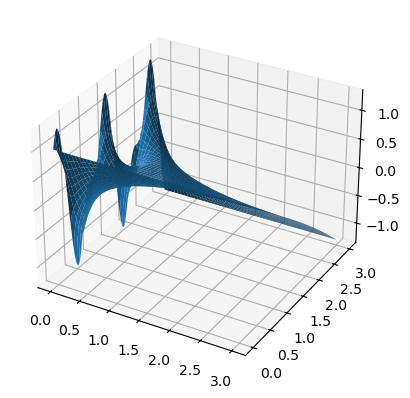

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0, L, N)
t = np.linspace(0, L, N) 
X, T = np.meshgrid(x, t)
ax.plot_surface(X, T, sol.y)

<Axes: >

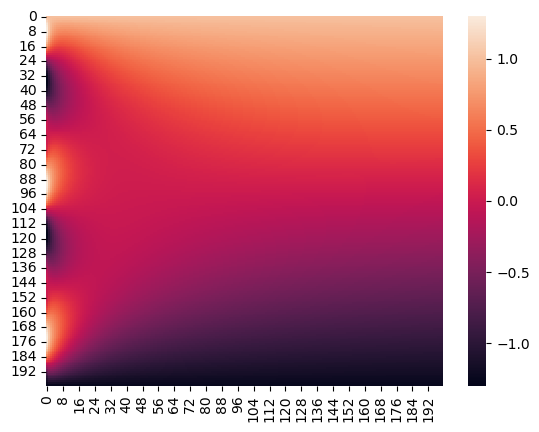

In [28]:
sns.heatmap(sol.y)

<Axes: >

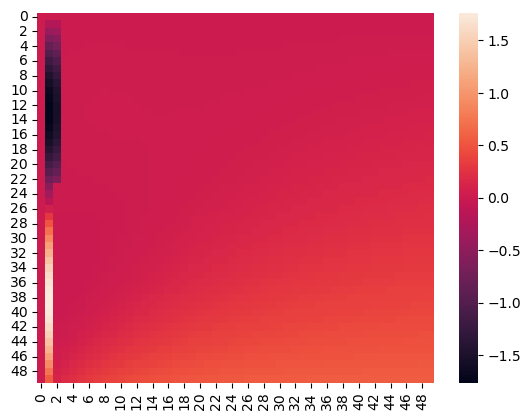

In [156]:
sns.heatmap(u - sol.y)

<h2>Wave</h2>

In [169]:
#solution of u_tt = cu_xx for points (X,T)
def wave_solution(coeff, X, T, ic, ict):
    #calculate at each point
    u = np.ones((X.shape[0], X.shape[0]))
    for i in range(X.shape[0]):
        #u[i,0] = ic(X[i])
        for j in range(1, X.shape[0]):
            u[i, j] = 1/2 * (ic(X[i] - coeff * T[j]) + ic(X[i] + coeff * T[j])) + 1/(2*coeff)*quad(lambda y : ict(y), X[i] - coeff*T[j], X[i] + coeff*T[j])[0]
    return u

In [160]:
X = np.linspace(0, 1, 50)
T = np.linspace(0, 1, 50)
u = wave_solution(1, X, T, lambda y : 5 * np.sin(10*y), lambda y : 1)

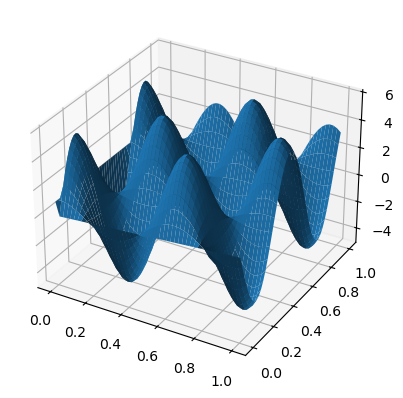

In [161]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, T = np.meshgrid(X, T)
ax.plot_surface(X, T, u)

<Axes: >

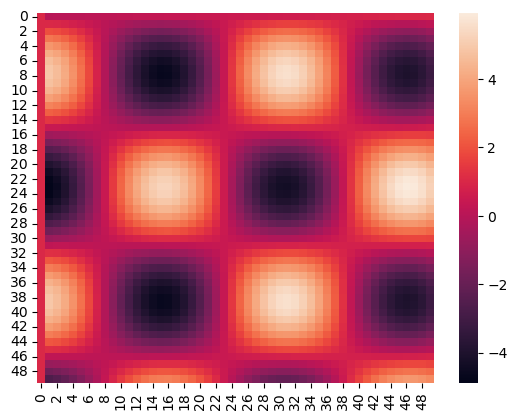

In [163]:
sns.heatmap(u)

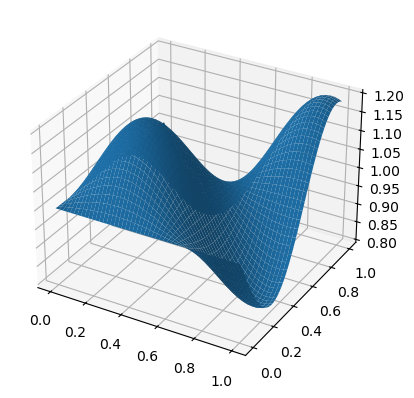

In [177]:
X = np.linspace(0, 1, 50)
T = np.linspace(0, 1, 50)
u = wave_solution(1, X, T, lambda y : 1, lambda y : np.sin(5*y))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, T = np.meshgrid(X, T)
ax.plot_surface(X, T, u)

<Axes: >

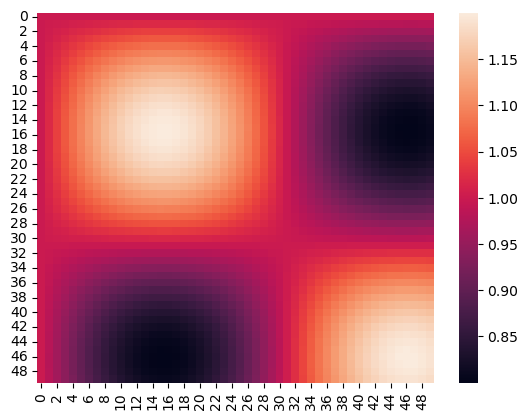

In [178]:
sns.heatmap(u)

In [ ]:
res = []
        for i in range(num_initial_points * 10):
            if self.IC_types == "train":
                base_frequency = 2 * np.pi / self.x_range
                n1, n2 = rng.randint(1, 3, size=2)
                frequencies = base_frequency * np.array([n1, n2])

                random_phases = rng.uniform(0, 2 * np.pi, size=2)
                random_amplitudes = rng.uniform(0, 1, size=2)

                # Composite wave function
                def _func(x):
                    # return random_amplitudes[0] * np.sin(
                    #     base_frequency * x + random_phases[0])
                    wave1 = random_amplitudes[0] * np.sin(frequencies[0] * x + random_phases[0])
                    wave2 = random_amplitudes[1] * np.sin(frequencies[1] * x + random_phases[1])
                    return wave1 + wave2

                vec = _func(self.x_grid.flatten())
                slope = vec[-1] - vec[0]
                slope /= self.x_range
                vec = vec - slope * self.x_grid.flatten()
                min, max = np.min(vec), np.max(vec)

                def func(x):
                    val = _func(x)
                    linear = slope * x
                    val = val - linear
                    val = (val - min) / (max - min)
                    return val

            else:
                means = rng.uniform(0.5, 1.5, size=2)
                # means2 = rng.uniform(1,1.5)
                std_devs = rng.uniform(0.1, 0.5, size=2)  # Random standard deviations
                sign = rng.randint(2, size=2) * 2 - 1  # Random standard deviations

                # Define the composite Gaussian function
                def _func(x):
                    gaussian1 = np.exp(-((x - means[0]) ** 2) / (2 * std_devs[0] ** 2))
                    gaussian2 = np.exp(-((x - means[1]) ** 2) / (2 * std_devs[1] ** 2))

                    return sign[0] * gaussian1 + sign[1] * gaussian2

                vec = _func(self.x_grid.flatten())
                slope = vec[-1] - vec[0]
                slope /= self.x_range
                vec = vec - slope * self.x_grid.flatten()
                min, max = np.min(vec), np.max(vec)

                def func(x):
                    val = _func(x)
                    linear = slope * x
                    val = val - linear
                    val = (val - min) / (max - min)
                    return val

            try:
                y = [func(self.x_grid.flatten())]
                for cur_t in t_eval[1:]:
                    x_adjusted1 = (self.x_grid.flatten() - beta * cur_t) % self.x_range
                    x_adjusted2 = (self.x_grid.flatten() + beta * cur_t) % self.x_range
                    y.append(0.5 * func(x_adjusted1) + 0.5 * func(x_adjusted2))
                y = np.array(y)
                res.append(torch.from_numpy(y.astype(np.single)).unsqueeze(-1))
                if len(res) >= num_initial_points:
                    break

<h2>Cahn Hilliard equations</h2>

In [37]:
# Parameters

L = 10  # Length of the domain

N = 100  # Number of grid points

def cahnHilliard(t, u, eps):

    def func(t, u):
        d2u_dx2 = np.zeros_like(u)
        rhs = np.zeros_like(u)
        dx = L / N
        # Compute second spatial derivatives using central differences
        for i in range(1, N - 1):
            d2u_dx2[i] = (u[i - 1] - 2 * u[i] + u[i + 1]) / dx**2

        # Periodic boundary conditions
        d2u_dx2[0] = (u[-1] - 2 * u[0] + u[1]) / dx**2
        d2u_dx2[-1] = (u[-2] - 2 * u[-1] + u[0]) / dx**2

        f = u**3 - u
        fu = 3 * u**2 - 1

        d2u_dx2af = eps**2 * d2u_dx2 + fu

        for i in range(1, N - 1):
            rhs[i] = (d2u_dx2af[i - 1] - 2 * d2u_dx2af[i] + d2u_dx2af[i + 1]) / dx**2

        # Periodic boundary conditions
        rhs[0] = (d2u_dx2af[-1] - 2 * d2u_dx2af[0] + d2u_dx2af[1]) / dx**2
        rhs[-1] = (d2u_dx2af[-2] - 2 * d2u_dx2af[-1] + d2u_dx2af[0]) / dx**2

        du_dt = -d2u_dx2af
        return du_dt

    return func(t, u)

In [38]:
T = 1

t_span = (0, T)  # Time interval

eps = 0

# Initial conditions

y0_points = np.linspace(0,L,N)

y0 = [1/2*np.sin(2*y) for y in y0_points]  # Initial heat pulse at the center


# Solve the heat equation

sol0 = solve_ivp(cahnHilliard, t_span, y0, method="BDF", args=(0,), t_eval=np.linspace(0,T,N))
sol1 = solve_ivp(cahnHilliard, t_span, y0, method="BDF", args=(0.1,), t_eval=np.linspace(0,T,N))
sol2 = solve_ivp(cahnHilliard, t_span, y0, method="BDF", args=(0.01,), t_eval=np.linspace(0,T,N))
#sol10 = solve_ivp(cahnHilliard, t_span, y0, method="BDF", args=(1,), t_eval=np.linspace(0,T,N))


In [39]:
sol0

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.010e-02 ...  9.899e-01  1.000e+00]
        y: [[ 0.000e+00  1.010e-02 ...  5.411e-01  5.423e-01]
            [ 1.003e-01  1.101e-01 ...  5.516e-01  5.525e-01]
            ...
            [ 4.062e-01  4.113e-01 ...  5.709e-01  5.711e-01]
            [ 4.565e-01  4.602e-01 ...  5.730e-01  5.731e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 48
     njev: 1
      nlu: 7

In [40]:
sol1

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.010e-02 ...  9.899e-01  1.000e+00]
        y: [[ 0.000e+00  4.418e-03 ... -1.212e-01 -1.304e-01]
            [ 1.003e-01  1.102e-01 ...  7.678e-01  7.718e-01]
            ...
            [ 4.062e-01  4.114e-01 ...  4.594e-01  4.578e-01]
            [ 4.565e-01  4.653e-01 ...  8.353e-01  8.377e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 50
     njev: 1
      nlu: 7

In [41]:
sol2

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.010e-02 ...  9.899e-01  1.000e+00]
        y: [[ 0.000e+00  1.004e-02 ...  5.406e-01  5.418e-01]
            [ 1.003e-01  1.101e-01 ...  5.516e-01  5.525e-01]
            ...
            [ 4.062e-01  4.113e-01 ...  5.709e-01  5.711e-01]
            [ 4.565e-01  4.602e-01 ...  5.733e-01  5.734e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 48
     njev: 1
      nlu: 7

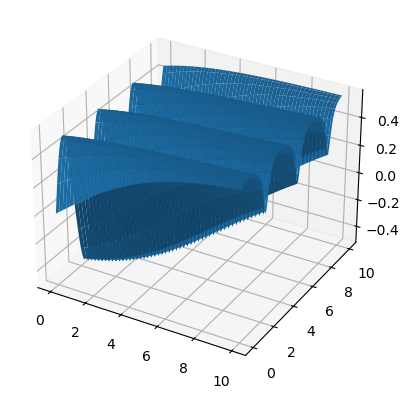

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0, L, N)
t = np.linspace(0, L, N) 
X, T = np.meshgrid(x, t)
ax.plot_surface(X, T, sol0.y)

MemoryError: Unable to allocate 74.5 GiB for an array with shape (100, 1000000, 100) and data type float64

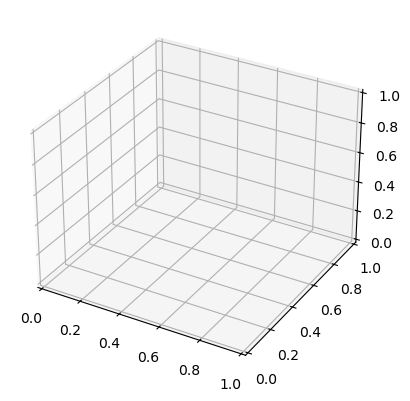

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0, L, N)
t = np.linspace(0, T, N) 
X, T = np.meshgrid(x, t)
ax.plot_surface(X, T, sol1.y)

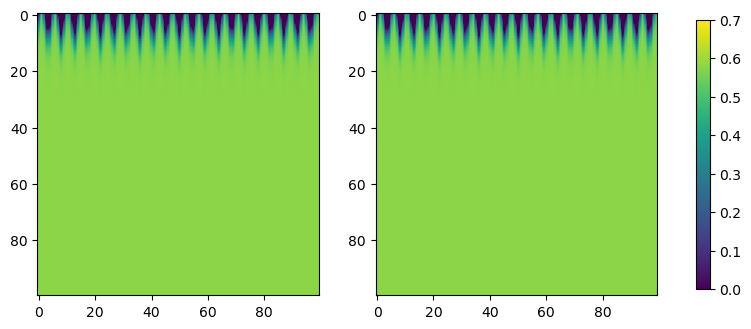

In [157]:
#eps = 0 vs eps=0.01
fig, axe = plt.subplots(ncols=2, figsize=(10,10))
im = axe[0].imshow(np.transpose(sol0.y), vmin=0, vmax=0.7)
axe[1].imshow(np.transpose(sol10.y), vmin=0, vmax=0.7)
fig.colorbar(im, ax=axe, location='right', shrink=0.35)
plt.show()

<Axes: >

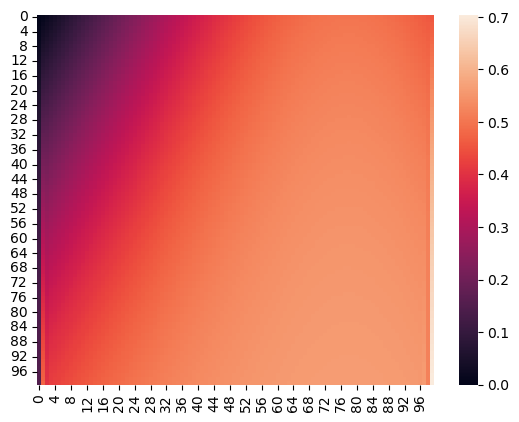

In [69]:
sns.heatmap(np.transpose(sol1.y))

<Axes: >

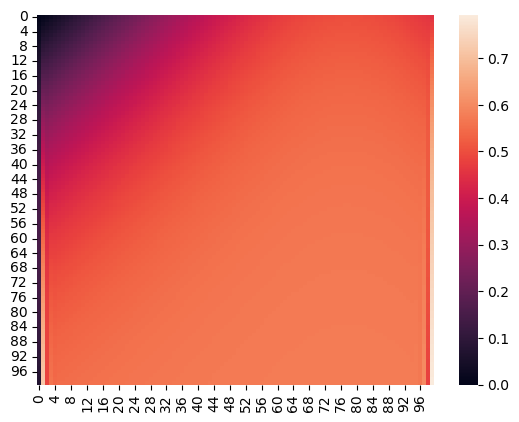

In [36]:
#eps = 0.1
sns.heatmap(np.transpose(sol.y))

In [58]:
A = np.where(sol.y > -10, sol.y, 0)

<Axes: >

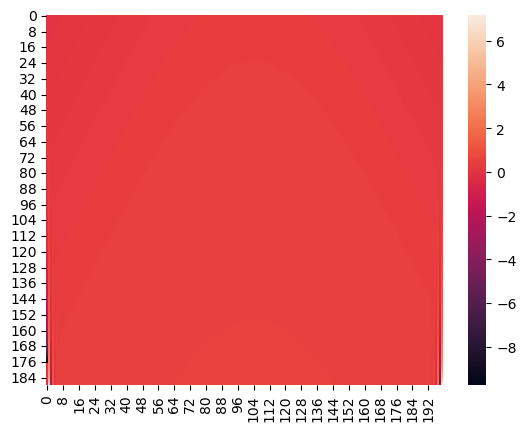

In [59]:
#eps = 0.01
sns.heatmap(np.transpose(A))

<Axes: >

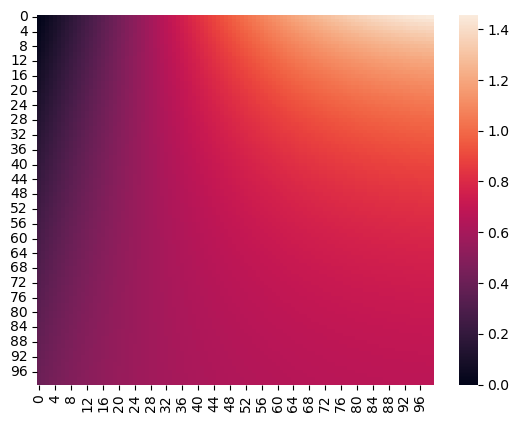

In [58]:
#eps = 0
sns.heatmap(np.transpose(sol.y))

<Axes: >

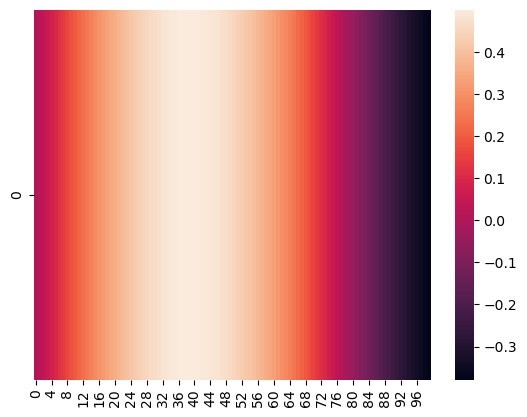

In [14]:
#eps = 1, T = 2
sns.heatmap(np.transpose(sol.y))

<Axes: >

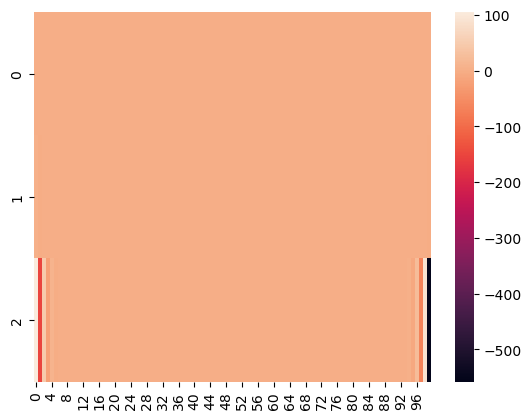

In [16]:
#eps = 0.1, T = 2
sns.heatmap(np.transpose(sol.y))

<Axes: >

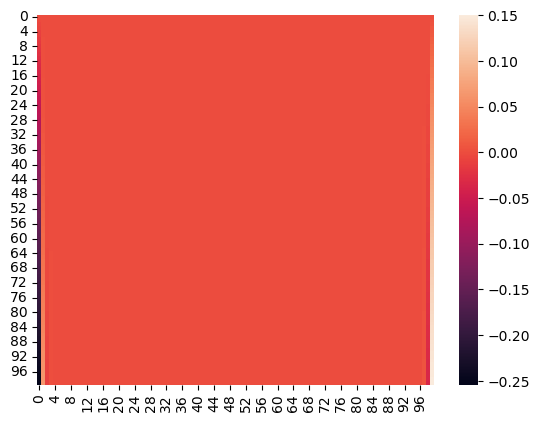

In [84]:
#eps = 0.01, T = 0.5
sns.heatmap(np.transpose(sol1.y - sol0.y))

In [68]:
sol.y.min()

-16.978904439995034

<Axes: >

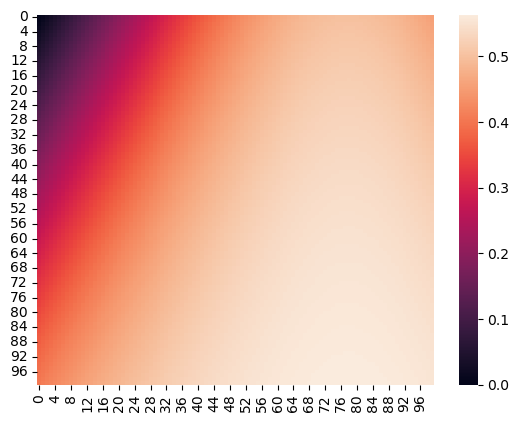

In [82]:
#eps = 0, T = 0.5
sns.heatmap(np.transpose(sol0.y))

<h2>Korteweg–De Vries</h2>